# Predicting the Sale Price of Bulldozer susing Machine Learning

In this notebook, we're going to go through an example machine learning project with the goial of prediction the sale price of bulldozers.

## 1. Problem Defination.

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from Kaggle Bluebook for Bulldozers competition:https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
   
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation

* Evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the Evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note**: the goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features.

Kaggle provides a data dictionarydetailing all of the features of the dataset. You can view this data dictionary on Kaggle: 
https://www.kaggle.com/c/bluebook-for-bulldozers/data?

## 5. Modelling 
## 6. Experimentation

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
# Import training and validation sets
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

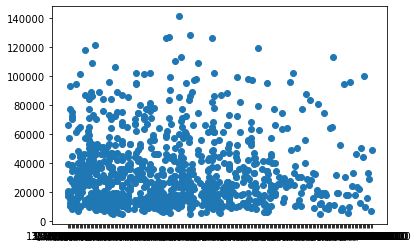

In [5]:
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [6]:
df['saledate'][:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

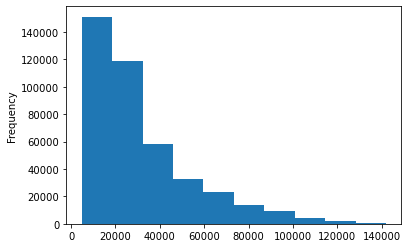

In [7]:
df['SalePrice'].plot.hist();

In [8]:
df.saledate.dtype

dtype('O')

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter. 

In [9]:
# Import data again but this time parse dates
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [10]:
df.saledate.dtype

dtype('<M8[ns]')

In [11]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

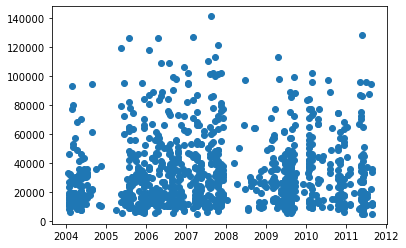

In [12]:
fig,ax = plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000]);

In [13]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [15]:
df.saledate[:20]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate
 
When working with time series data, it's a good idea to sort by date.

In [16]:
# Sort DataFrame  in date order
df.sort_values(by = ['saledate'],
               inplace=True,
               ascending=True)

In [17]:
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame
We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [18]:
# Make a copy 
df_tmp = df.copy()

### Add datetime parametersfor `saledate` columns

In [19]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear


In [20]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [21]:
# Now er're enriched our DF with date time features , we can remove 'saledate' column
df_tmp.drop(['saledate'],axis = 1,inplace = True)

In [22]:
# Check the values of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We're done enough EDA (we could always do more) but let's start to do
some model driven EDA

In [ ]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor
    
model = RandomForestRegressor(n_jobs = -1,
                              random_state=12)

model.fit(df_tmp.drop('SalePrice',axis = 1),df_tmp.SalePrice)

In [ ]:
df_tmp.info()

In [ ]:
df_tmp.isna().sum()

### Converting string to categories

One wat we can turn of our data into numbers is by converting them into pandas categories.


In [25]:
df_tmp.head().T


,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [26]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [28]:
# Find the columns which contain strings
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
# This will turn all the string value into category values
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
     df_tmp[label] = content.astype('category').cat.as_ordered()

In [31]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [33]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [40]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

In [43]:
# Check missing data
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data 

In [44]:
# Export current tmp dataframe
df_tmp.to_csv('data/bluebook-for-bulldozers/train_tmp.csv',index = False)

In [2]:
# Import preprocessed data
df_tmp = pd.read_csv('data/bluebook-for-bulldozers/train_tmp.csv',
              low_memory = False)

In [3]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [4]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill Missing Values

### First Fill  numeric missing values


In [5]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [6]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [7]:
# Check for which numeric column have null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [8]:
# Fill numeric rows with median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())
            
        

In [9]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
         if pd.isnull(content).sum():
                print(label)

In [10]:
# Check to see how many examples where missing
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [11]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turining categorical variables into numbers

In [12]:
# Check for columns which aren't numeric
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [13]:
# Turn categorical variables into numbers and fill missing values
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate wheather sample had missing values
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1
        

In [14]:
pd.Categorical(df_tmp['state']).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [15]:
pd.Categorical(df_tmp['UsageBand']).codes + 1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [16]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [17]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [18]:
df_tmp.isna().sum().value_counts()

0    103
dtype: int64

Now that all of data is numeric as weel aas our DF has no missing values, we should be able to build a machine learing model.

In [19]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [20]:
len(df_tmp)

412698

In [21]:

%%time
from sklearn.ensemble import RandomForestRegressor

# Instantiate model
model = RandomForestRegressor(n_jobs = -1,random_state=12)

# Fit the model 
model.fit(df_tmp.drop('SalePrice',axis = 1),df_tmp['SalePrice'])


KeyboardInterrupt: 

In [97]:
# Score the model
model.score(df_tmp.drop('SalePrice',axis = 1),df_tmp['SalePrice'])

IndexError: list index out of range

**Question** Why doesn't the above metric hold water?(why isn't the metric reliable)

### Splitting data into train/validation sets

In [ ]:
df_tmp.saleYear

In [ ]:
df_tmp.saleYear.value_counts()

In [22]:
# Split the data into training and validation 
df_val  = df_tmp[df_tmp.saleYear == 2012] 
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val),len(df_train)

(11573, 401125)

In [23]:
# Split data into X & y

X_train,y_train  = df_train.drop('SalePrice',axis = 1),df_train.SalePrice
X_valid,y_valid = df_val.drop('SalePrice',axis = 1),df_val.SalePrice

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [24]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function

In [71]:
# Create evaluation function (the competition uses RMSLE
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    '''
    Calculates root mean squared log error between predictions and 
    true labels.
    '''
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds  = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
              "Valid MAE": mean_absolute_error(y_valid,val_preds),
              "Training RMSLE":rmsle(y_train,train_preds),
              "Valid RMSLE": rmsle(y_valid,val_preds),
              "Training R^2": r2_score(y_train,train_preds),
              "Valid R^2": r2_score(y_valid,val_preds)}
    return scores

    

## Testing our model on a subset (to tune the hyperparamters)

In [49]:
# # This takes far too long... for experimenting
# %%time
# model  = RandomForestRegressor(n_jobs = -1,
#                                random_state = 42)

# model.fit(X_train,y_train)

In [39]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state = 42,
                              max_samples=10000)

In [40]:
%%time 

# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train,y_train)

CPU times: user 45.8 s, sys: 2.27 s, total: 48 s
Wall time: 2min 37s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [41]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [54]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {'n_estimators': np.arange(10,100,10),
           'max_depth': [None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2),
           'max_features': [0.5,1,"sqrt","auto"],
           'max_samples': [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                     random_state = 12),
                                                     param_distributions=rf_grid,
                                                     n_iter = 100,
                                                     cv = 5,
                                                     verbose = True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 49.2min finished


CPU times: user 25min 22s, sys: 3min 20s, total: 28min 43s
Wall time: 49min 20s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=12),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [57]:
# Fit the best model hyperparameters (Most Ideal Hyperparameters)
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

CV

### Train a model with the best hyperparameters

**Note**: These were found after 100 iterations of `RandomizedSearch`

In [58]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators= 30,
                                    min_samples_split=10,
                                    min_samples_leaf = 1,
                                    max_features='auto',
                                    max_depth=None,
                                    max_samples = None,
                                    n_jobs = -1,
                                    random_state = 12)


# Fit the ideal model
ideal_model.fit(X_train,y_train)

CPU times: user 7min 7s, sys: 2.24 s, total: 7min 9s
Wall time: 2min 4s


RandomForestRegressor(min_samples_split=10, n_estimators=30, n_jobs=-1)

In [59]:
# Scores for ideal_model(trained on all the data) 
show_scores(ideal_model)

{'Training MAE': 2502.505740986134,
 'Valid MAE': 6138.67918883773,
 'Training RMSLE': 0.12628371065186508,
 'Valid RMSLE': 0.25368243020864617,
 'Training R^2': 0.9690346749552424,
 'Valid R^2': 0.8712764285588188}

In [61]:
#Score of rs_model (only trained on ~10,000 examples)

show_scores(model)


{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

In [62]:
from joblib import dump

In [64]:
dump(filename='ideal_model.joblib',value = ideal_model)
dump(filename='model.joblib',value = model)

['model.joblib']

In [26]:
from joblib import dump,load

ideal_model = load(filename="ideal_model.joblib")
model = load(filename='model.joblib')

In [27]:
show_scores(ideal_model)

{'Training MAE': 2502.505740986134,
 'Valid MAE': 6138.67918883773,
 'Training RMSLE': 0.12628371065186506,
 'Valid RMSLE': 0.25368243020864617,
 'Training R^2': 0.9690346749552424,
 'Valid R^2': 0.8712764285588188}

## Make predictions on test data

In [28]:
# Import the test data
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [29]:
# Make Predictions on the test datset
test_preds = ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

### Preprocessing the data (getting the test dataset in the same format as our traning dataset)

In [30]:
def preprocess_data(df):
    """
    Performs transformations on df and return transformed df.
    """
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    df.drop('saledate',axis = 1 ,inplace = True)
    
    # Fill the numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
             # Add a binary column which tells us if the data was missing
             df[label+'_is_missing'] = pd.isnull(content)
             # Fill missing numeric values with median
             df[label] = content.fillna(content.median())
        
        # Fill the categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df 

In [31]:
#  Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [32]:
# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 101 

In [33]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [34]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [35]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has the same features as our training dataframe , we can make predictions! 

In [36]:
# Make prediction on the test data
test_preds  = ideal_model.predict(df_test)

In [37]:
test_preds

array([22160.78272762, 19780.40872785, 47528.26511724, ...,
       12229.3418448 , 17654.38093388, 30631.68505106])

We've made some predictions but they're not in the same format Kaggle is asking for :-
  https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [38]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test["SalesID"]
df_preds['SalesPrice'] = test_preds

In [39]:
df_preds.head()

,SalesID,SalesPrice
0,1227829,22160.782728
1,1227844,19780.408728
2,1227847,47528.265117
3,1227848,86573.762603
4,1227863,41641.017917


In [40]:
# Export prediction data
df_preds.to_csv('data/bluebook-for-bulldozers/test_predictions.csv',index = False)


 ### Feature Importance
 
 Feature importance seeks to figgure out which different attributes of the data were most importance when it come to predeicting the **target variable** (SalesPrice).

In [41]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([4.85282170e-02, 1.35696182e-02, 3.29048504e-02, 2.11146158e-04,
       3.56087188e-03, 2.68910553e-01, 2.63535424e-03, 8.77448112e-04,
       1.96828826e-02, 7.30034863e-02, 5.30203050e-02, 4.32810061e-03,
       3.23899355e-03, 2.33886600e-01, 3.84401824e-02, 7.11592040e-03,
       2.21480236e-04, 1.68155788e-04, 1.65835564e-03, 8.83300480e-03,
       3.29581965e-04, 2.49128183e-05, 4.76502095e-04, 1.75496439e-04,
       1.48762593e-03, 2.34584460e-05, 2.66865893e-03, 7.97493563e-03,
       2.65745211e-03, 5.51628916e-04, 2.26759971e-03, 2.18117251e-03,
       2.25245568e-03, 2.23064228e-03, 1.23555238e-03, 1.54390199e-03,
       7.79948176e-04, 1.84479429e-02, 1.13449065e-05, 2.11778759e-06,
       1.58762419e-04, 9.66235262e-04, 1.08453266e-03, 6.30067744e-04,
       1.67603928e-04, 3.75509190e-04, 1.56097215e-04, 1.45125728e-03,
       9.54626226e-04, 1.12570345e-04, 2.64551996e-04, 7.67376181e-02,
       2.19862721e-03, 7.05285552e-03, 3.38265627e-03, 1.28501121e-02,
      

In [42]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3137,1055,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4514,1684,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3389,1175,...,True,True,True,True,True,True,True,True,True,True


In [43]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
                      .sort_values('feature_importances',ascending = False)
                      .reset_index(drop = True))
    
    # Plot the dataframe
    fig,ax = plt.subplots(figsize = (7,7))
    ax.barh(df['features'][:n],df['feature_importances'][:n])
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Features')
    ax.invert_yaxis()

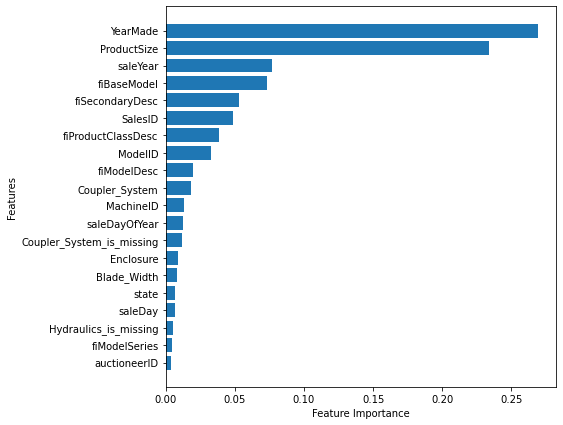

In [44]:
plot_features(X_train.columns,
             ideal_model.feature_importances_
             )

**Question to finish:** Why might khonwing the feature importances of a trained machine learning model be helpful?

**Final challenge:** What other machine learning models could you try on our dataset?

In [53]:
# Using CatBoostRegressor 
from catboost import CatBoostRegressor

In [54]:
# Instantiate the model
cat_reg = CatBoostRegressor()

# Fitting the CatBoostRegressor
cat_reg.fit(X_train,y_train)


Learning rate set to 0.113445
0:	learn: 21728.9722411	total: 406ms	remaining: 6m 45s
1:	learn: 20591.9362863	total: 546ms	remaining: 4m 32s
2:	learn: 19703.5912427	total: 705ms	remaining: 3m 54s
3:	learn: 18912.8325717	total: 838ms	remaining: 3m 28s
4:	learn: 18232.0336828	total: 985ms	remaining: 3m 16s
5:	learn: 17638.9081018	total: 1.09s	remaining: 3m 1s
6:	learn: 17055.5341019	total: 1.24s	remaining: 2m 55s
7:	learn: 16645.1141547	total: 1.34s	remaining: 2m 46s
8:	learn: 16241.1828344	total: 1.49s	remaining: 2m 43s
9:	learn: 15863.4968798	total: 1.62s	remaining: 2m 40s
10:	learn: 15560.2248149	total: 1.76s	remaining: 2m 37s
11:	learn: 15250.8267256	total: 1.87s	remaining: 2m 33s
12:	learn: 14989.4443908	total: 2s	remaining: 2m 31s
13:	learn: 14746.2768330	total: 2.13s	remaining: 2m 29s
14:	learn: 14487.2914475	total: 2.27s	remaining: 2m 28s
15:	learn: 14271.3490287	total: 2.37s	remaining: 2m 25s
16:	learn: 14084.7197887	total: 2.49s	remaining: 2m 24s
17:	learn: 13876.4572745	total: 

150:	learn: 9171.1386191	total: 21.2s	remaining: 1m 59s
151:	learn: 9161.6080051	total: 21.3s	remaining: 1m 58s
152:	learn: 9156.7803465	total: 21.4s	remaining: 1m 58s
153:	learn: 9146.5209303	total: 21.5s	remaining: 1m 58s
154:	learn: 9137.0282498	total: 21.7s	remaining: 1m 58s
155:	learn: 9125.8540495	total: 21.8s	remaining: 1m 57s
156:	learn: 9116.0637136	total: 21.9s	remaining: 1m 57s
157:	learn: 9108.2199615	total: 22s	remaining: 1m 57s
158:	learn: 9100.6467481	total: 22.2s	remaining: 1m 57s
159:	learn: 9092.2159375	total: 22.3s	remaining: 1m 57s
160:	learn: 9084.8440033	total: 22.4s	remaining: 1m 56s
161:	learn: 9076.0598132	total: 22.6s	remaining: 1m 56s
162:	learn: 9067.4402315	total: 22.8s	remaining: 1m 56s
163:	learn: 9060.5065052	total: 22.9s	remaining: 1m 56s
164:	learn: 9053.8011066	total: 23s	remaining: 1m 56s
165:	learn: 9047.1016530	total: 23.2s	remaining: 1m 56s
166:	learn: 9038.9797559	total: 23.3s	remaining: 1m 56s
167:	learn: 9025.8533004	total: 23.5s	remaining: 1m 

297:	learn: 8312.5438758	total: 40.7s	remaining: 1m 35s
298:	learn: 8308.2435404	total: 40.9s	remaining: 1m 35s
299:	learn: 8304.9186405	total: 41.1s	remaining: 1m 35s
300:	learn: 8302.7300098	total: 41.2s	remaining: 1m 35s
301:	learn: 8300.0720918	total: 41.3s	remaining: 1m 35s
302:	learn: 8296.6043016	total: 41.4s	remaining: 1m 35s
303:	learn: 8292.6831112	total: 41.6s	remaining: 1m 35s
304:	learn: 8289.5748672	total: 41.7s	remaining: 1m 34s
305:	learn: 8286.9640647	total: 41.8s	remaining: 1m 34s
306:	learn: 8284.7946578	total: 42s	remaining: 1m 34s
307:	learn: 8278.2238191	total: 42.1s	remaining: 1m 34s
308:	learn: 8276.1495771	total: 42.2s	remaining: 1m 34s
309:	learn: 8272.1904985	total: 42.3s	remaining: 1m 34s
310:	learn: 8267.9913475	total: 42.5s	remaining: 1m 34s
311:	learn: 8263.7425844	total: 42.6s	remaining: 1m 33s
312:	learn: 8261.0509368	total: 42.7s	remaining: 1m 33s
313:	learn: 8258.9893114	total: 42.9s	remaining: 1m 33s
314:	learn: 8254.9568564	total: 43s	remaining: 1m 

445:	learn: 7915.1648958	total: 58.3s	remaining: 1m 12s
446:	learn: 7912.8608335	total: 58.5s	remaining: 1m 12s
447:	learn: 7910.6561144	total: 58.6s	remaining: 1m 12s
448:	learn: 7908.7844042	total: 58.7s	remaining: 1m 12s
449:	learn: 7906.7040046	total: 58.8s	remaining: 1m 11s
450:	learn: 7904.8801672	total: 58.9s	remaining: 1m 11s
451:	learn: 7902.7034044	total: 59s	remaining: 1m 11s
452:	learn: 7900.7894409	total: 59.1s	remaining: 1m 11s
453:	learn: 7898.3009708	total: 59.3s	remaining: 1m 11s
454:	learn: 7897.0986828	total: 59.4s	remaining: 1m 11s
455:	learn: 7895.6287582	total: 59.5s	remaining: 1m 10s
456:	learn: 7893.1244387	total: 59.6s	remaining: 1m 10s
457:	learn: 7889.8177860	total: 59.7s	remaining: 1m 10s
458:	learn: 7887.1587598	total: 59.8s	remaining: 1m 10s
459:	learn: 7885.3486912	total: 59.9s	remaining: 1m 10s
460:	learn: 7883.6956547	total: 1m	remaining: 1m 10s
461:	learn: 7882.4832163	total: 1m	remaining: 1m 10s
462:	learn: 7880.8454332	total: 1m	remaining: 1m 9s
463:

594:	learn: 7667.2929547	total: 1m 15s	remaining: 51.4s
595:	learn: 7666.3740024	total: 1m 15s	remaining: 51.2s
596:	learn: 7664.1673483	total: 1m 15s	remaining: 51.1s
597:	learn: 7662.7786992	total: 1m 15s	remaining: 51s
598:	learn: 7659.7393746	total: 1m 15s	remaining: 50.8s
599:	learn: 7658.6247939	total: 1m 16s	remaining: 50.7s
600:	learn: 7656.4119337	total: 1m 16s	remaining: 50.5s
601:	learn: 7655.5841105	total: 1m 16s	remaining: 50.4s
602:	learn: 7654.7349463	total: 1m 16s	remaining: 50.3s
603:	learn: 7653.6688438	total: 1m 16s	remaining: 50.1s
604:	learn: 7651.9020861	total: 1m 16s	remaining: 50s
605:	learn: 7650.9428530	total: 1m 16s	remaining: 49.8s
606:	learn: 7649.7335439	total: 1m 16s	remaining: 49.7s
607:	learn: 7648.3563754	total: 1m 16s	remaining: 49.6s
608:	learn: 7645.8366769	total: 1m 17s	remaining: 49.5s
609:	learn: 7644.6705708	total: 1m 17s	remaining: 49.3s
610:	learn: 7643.1272995	total: 1m 17s	remaining: 49.2s
611:	learn: 7641.3322081	total: 1m 17s	remaining: 49

741:	learn: 7479.9217298	total: 1m 34s	remaining: 32.8s
742:	learn: 7478.4124982	total: 1m 34s	remaining: 32.6s
743:	learn: 7477.3821896	total: 1m 34s	remaining: 32.5s
744:	learn: 7476.2717628	total: 1m 34s	remaining: 32.4s
745:	learn: 7474.8835053	total: 1m 34s	remaining: 32.3s
746:	learn: 7473.5958741	total: 1m 34s	remaining: 32.1s
747:	learn: 7473.0323600	total: 1m 34s	remaining: 32s
748:	learn: 7471.9399891	total: 1m 35s	remaining: 31.9s
749:	learn: 7469.9783022	total: 1m 35s	remaining: 31.7s
750:	learn: 7469.2605117	total: 1m 35s	remaining: 31.6s
751:	learn: 7467.6385665	total: 1m 35s	remaining: 31.5s
752:	learn: 7466.4313664	total: 1m 35s	remaining: 31.4s
753:	learn: 7464.6902558	total: 1m 35s	remaining: 31.2s
754:	learn: 7463.6041722	total: 1m 35s	remaining: 31.1s
755:	learn: 7462.3106734	total: 1m 35s	remaining: 31s
756:	learn: 7461.1684880	total: 1m 36s	remaining: 30.8s
757:	learn: 7460.4082632	total: 1m 36s	remaining: 30.7s
758:	learn: 7459.7049168	total: 1m 36s	remaining: 30

888:	learn: 7331.2113690	total: 1m 51s	remaining: 13.9s
889:	learn: 7330.5127996	total: 1m 51s	remaining: 13.8s
890:	learn: 7329.7308837	total: 1m 51s	remaining: 13.6s
891:	learn: 7328.4877587	total: 1m 51s	remaining: 13.5s
892:	learn: 7327.7023288	total: 1m 51s	remaining: 13.4s
893:	learn: 7326.8102410	total: 1m 51s	remaining: 13.3s
894:	learn: 7326.3128017	total: 1m 52s	remaining: 13.1s
895:	learn: 7325.6678477	total: 1m 52s	remaining: 13s
896:	learn: 7325.3521173	total: 1m 52s	remaining: 12.9s
897:	learn: 7323.8242734	total: 1m 52s	remaining: 12.8s
898:	learn: 7323.2697263	total: 1m 52s	remaining: 12.6s
899:	learn: 7322.5454895	total: 1m 52s	remaining: 12.5s
900:	learn: 7321.6149601	total: 1m 52s	remaining: 12.4s
901:	learn: 7320.7902752	total: 1m 52s	remaining: 12.3s
902:	learn: 7319.6950373	total: 1m 53s	remaining: 12.1s
903:	learn: 7318.9732447	total: 1m 53s	remaining: 12s
904:	learn: 7317.7550107	total: 1m 53s	remaining: 11.9s
905:	learn: 7316.3930255	total: 1m 53s	remaining: 11

In [64]:
# Making predictions 
y_preds = cat_reg.predict(X_valid)

# Calculating rmsle function 
rmsle(y_valid,y_preds)

0.2588902231188816

In [65]:
show_scores(ideal_model)

{'Training MAE': 2502.505740986134,
 'Valid MAE': 6138.67918883773,
 'Training RMSLE': 0.12628371065186508,
 'Valid RMSLE': 0.25368243020864617,
 'Training R^2': 0.9690346749552424,
 'Valid R^2': 0.8712764285588188}

That't not shown much of a improvement

In [66]:
# Now Using XGBoost
from xgboost import XGBRegressor

In [67]:
# Instantiate the XGBRegressor
xgb_reg = XGBRegressor()

# Fitting the model in training dataset
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [76]:
# scoring the XGBRegressor
y_preds = xgb_reg.predict(X_valid)

# Evaluate  the model using rmsle
rmsle(y_valid,abs(y_preds))

0.2809356817330975